In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Lung Cancer.csv")
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [11]:
!pip install tensorflow

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop('id',axis=1,inplace=True)

In [14]:
df.isnull().sum()

,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 890000 non-null  float64
 1   gender              890000 non-null  object 
 2   country             890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   cancer_stage        890000 non-null  object 
 5   family_history      890000 non-null  object 
 6   smoking_status      890000 non-null  object 
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  object 
 14  end_treatment_date  890000 non-null  object 
 15  survived            890000 non-nul

In [16]:
df.tail()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
889995,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0
889999,55.0,Female,Malta,2021-07-26,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,2022-10-19,0


In [17]:
df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date']=pd.to_datetime(df['end_treatment_date'])

In [18]:
df['diagnosis_month']=df['diagnosis_date'].dt.month
df['end_treatment_month']=df['end_treatment_date'].dt.month

In [19]:
df['days_between_treatment']=(df['end_treatment_date']-df['diagnosis_date']).dt.days

In [20]:
df.drop(['diagnosis_date','end_treatment_date'],axis=1,inplace=True)

age


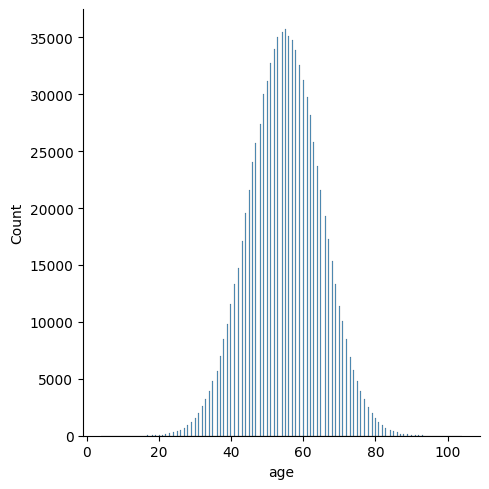

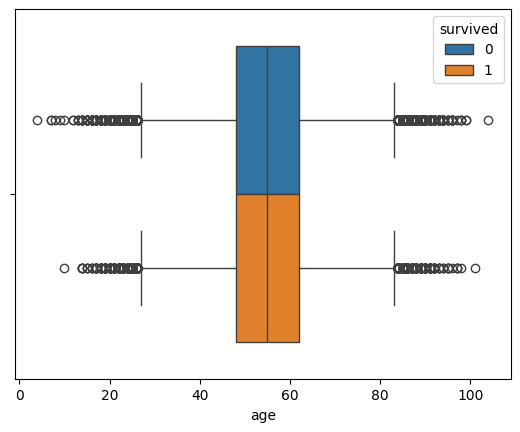

******************************************************************************************
bmi


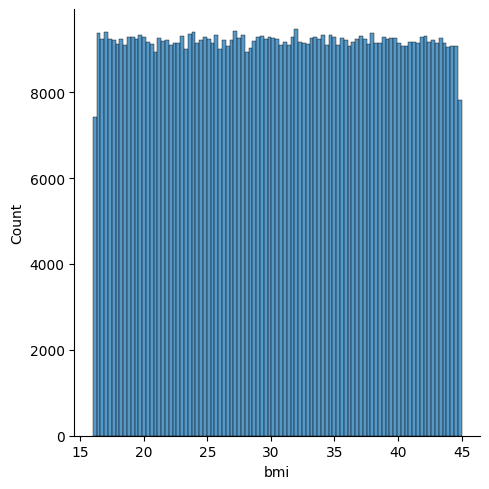

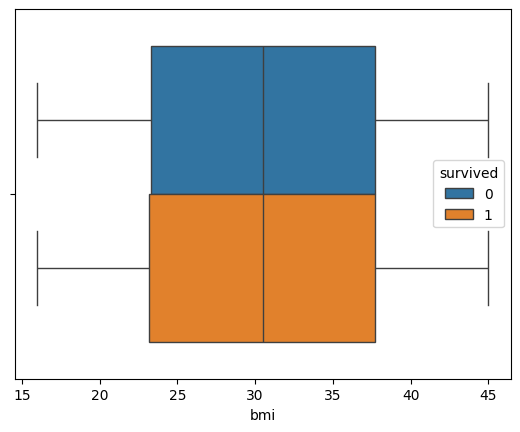

******************************************************************************************
cholesterol_level


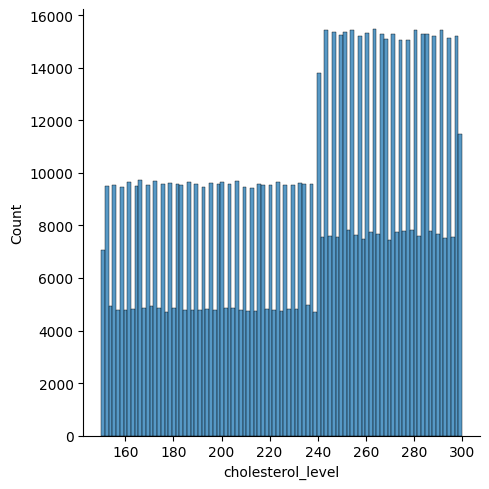

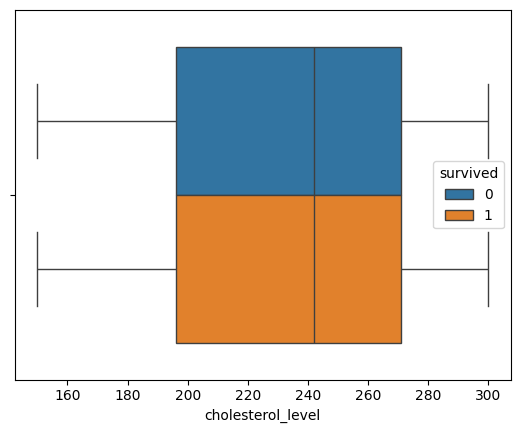

******************************************************************************************
hypertension


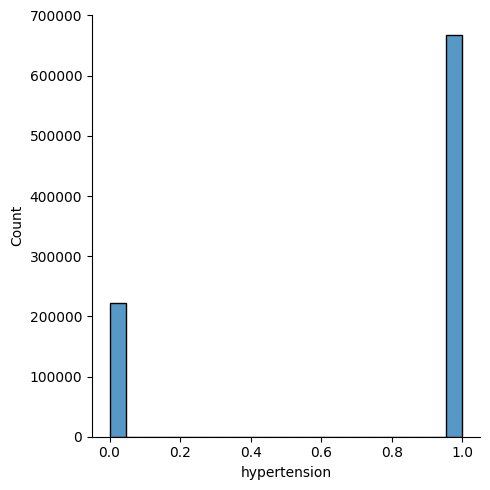

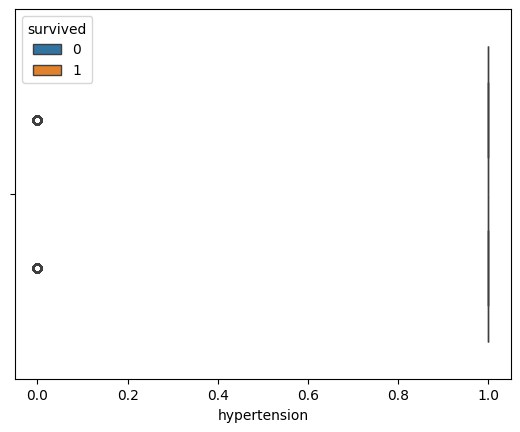

******************************************************************************************
asthma


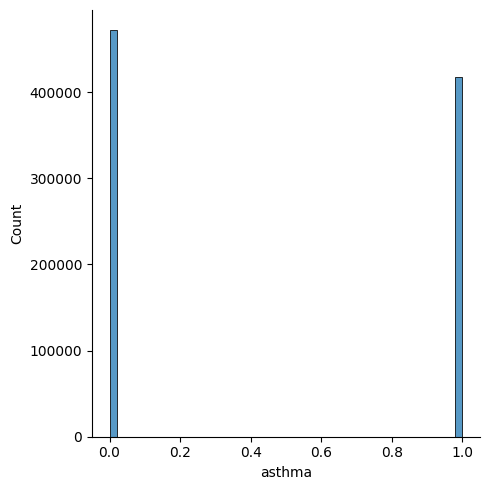

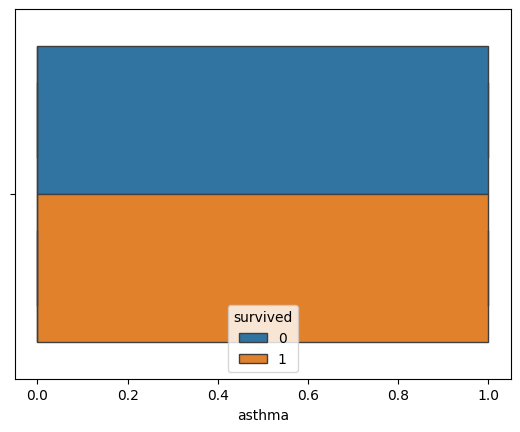

******************************************************************************************
cirrhosis


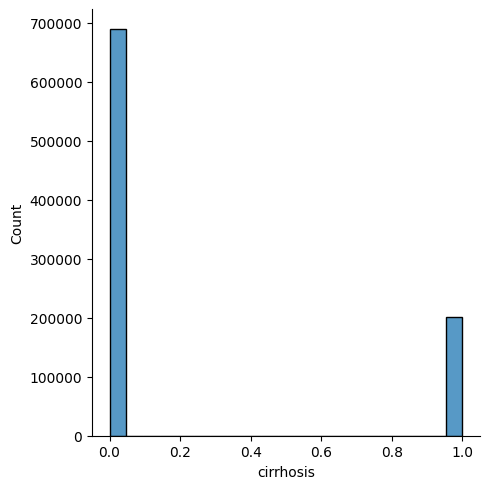

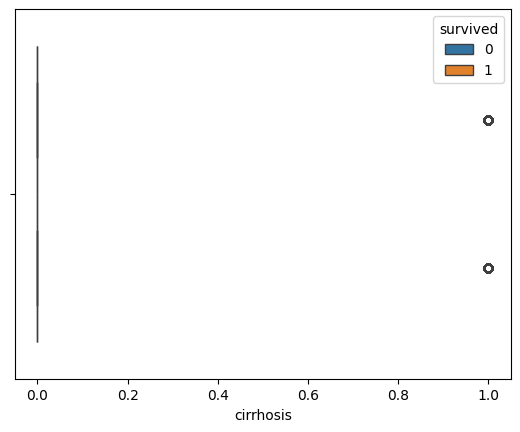

******************************************************************************************
other_cancer


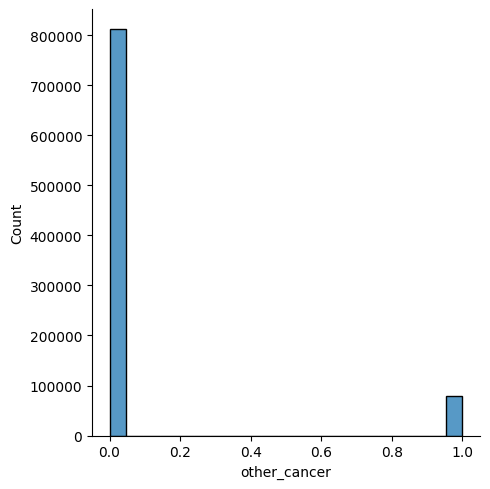

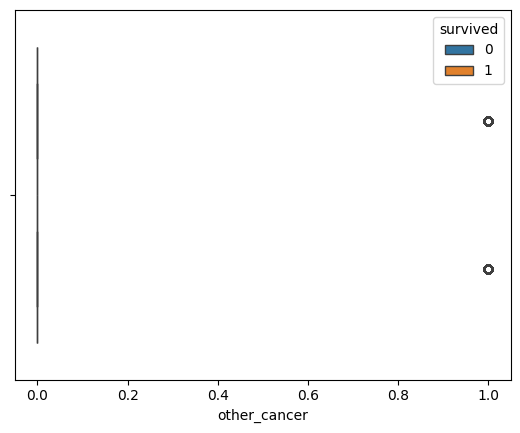

******************************************************************************************
survived


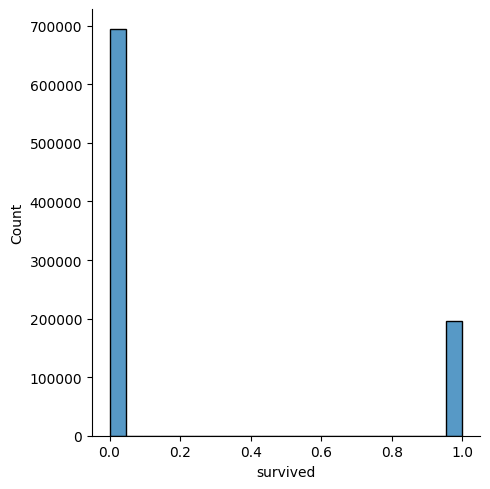

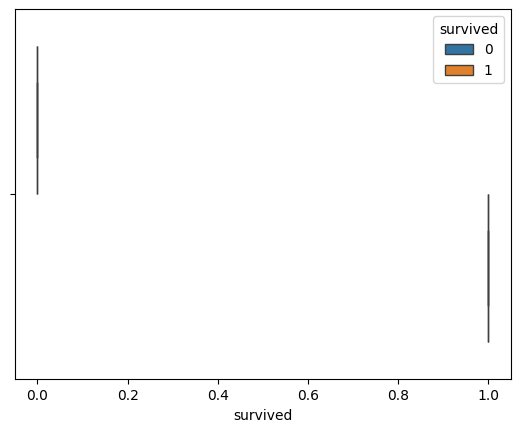

******************************************************************************************
diagnosis_month


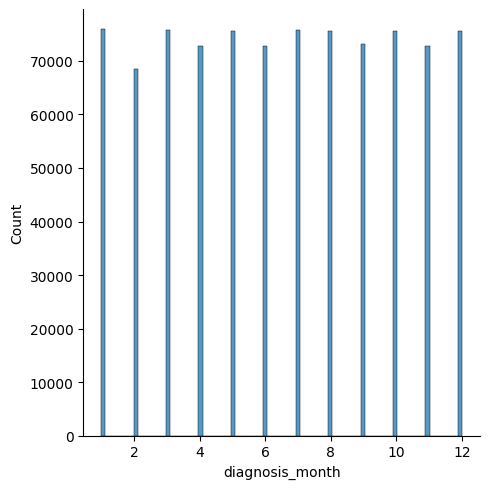

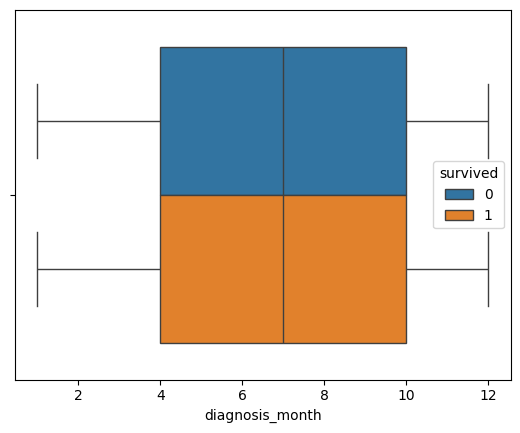

******************************************************************************************
end_treatment_month


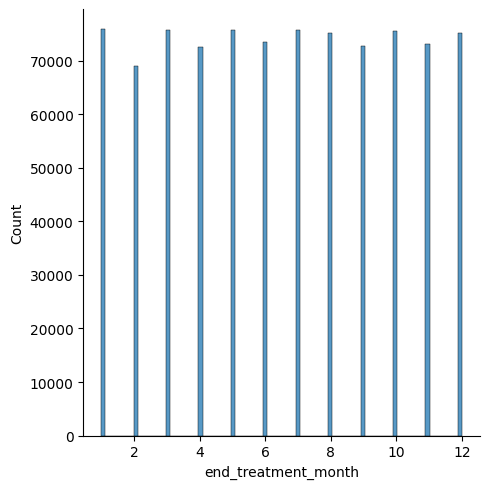

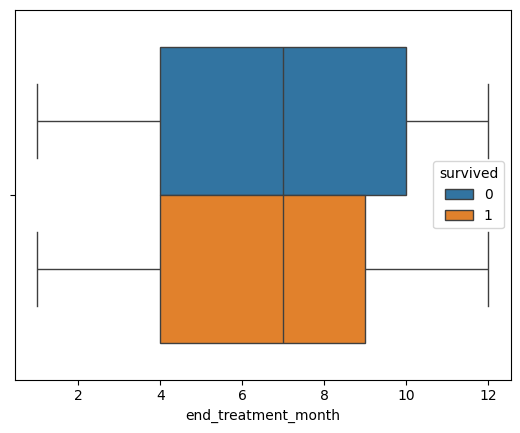

******************************************************************************************
days_between_treatment


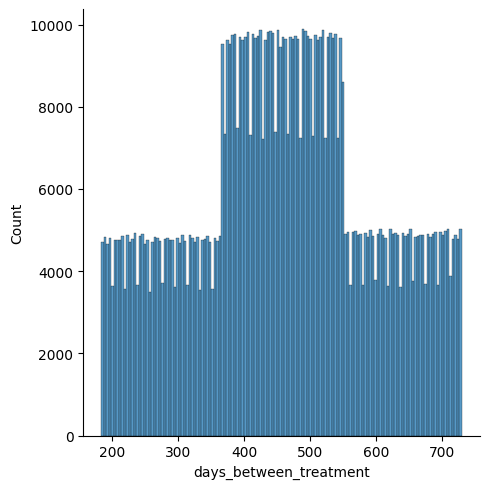

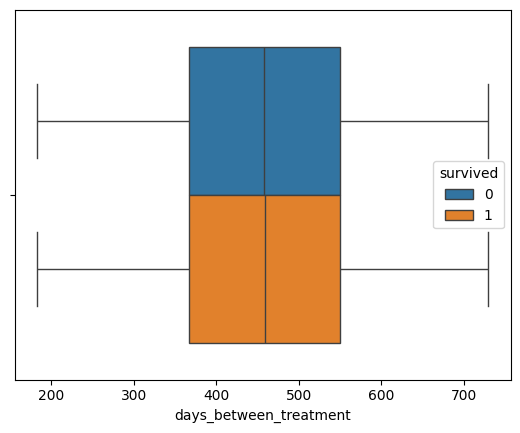

******************************************************************************************


In [21]:
for col_name in df.select_dtypes('number').columns:
  print(col_name)
  sns.displot(df[col_name])
  plt.show()
  sns.boxplot(data=df,x=col_name, hue='survived')
  plt.show()
  print('*'* 90)

gender


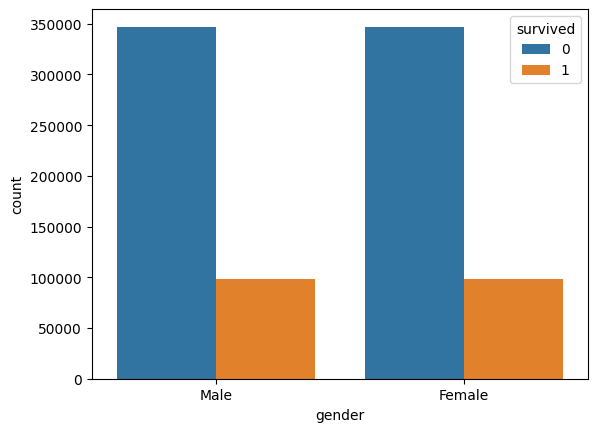

country


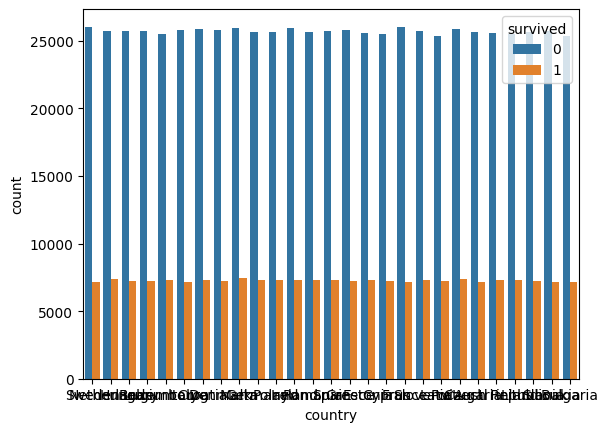

cancer_stage


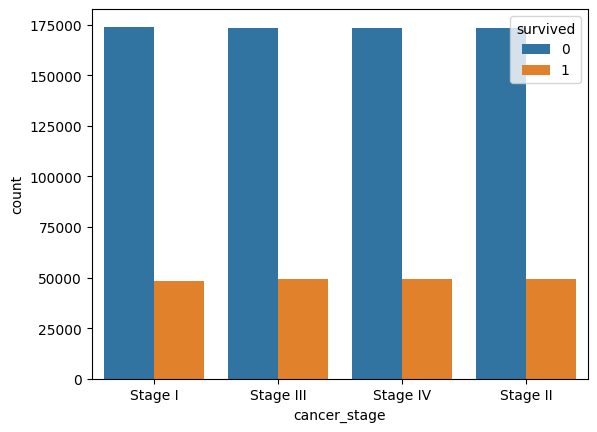

family_history


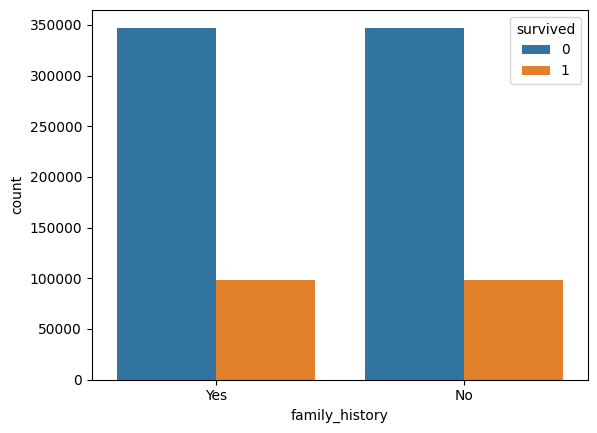

smoking_status


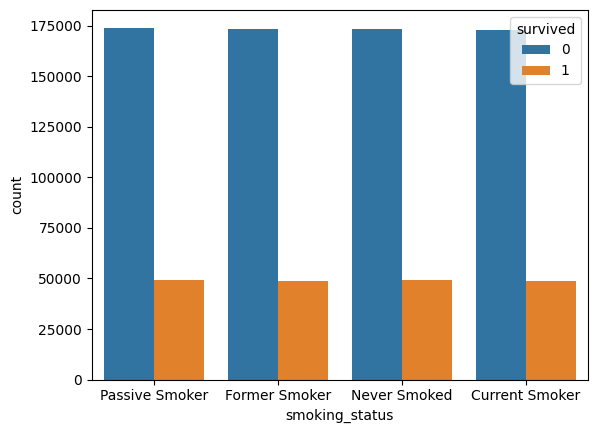

treatment_type


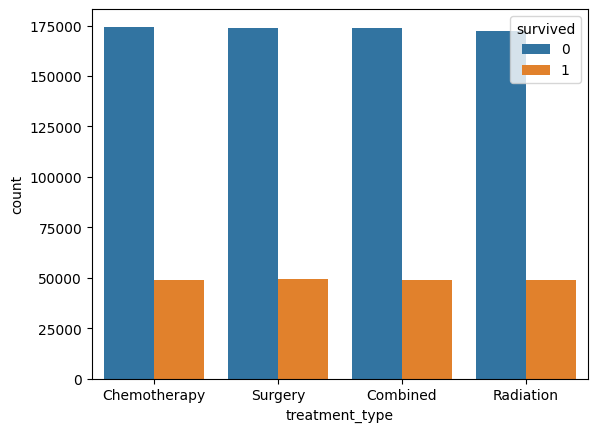

In [22]:
for col_name in df.select_dtypes('object').columns:
  print(col_name)
  sns.countplot(data=df,x=col_name, hue='survived')
  plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col_name in df.select_dtypes('object'):
  df[col_name]=le.fit_transform(df[col_name])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     890000 non-null  float64
 1   gender                  890000 non-null  int64  
 2   country                 890000 non-null  int64  
 3   cancer_stage            890000 non-null  int64  
 4   family_history          890000 non-null  int64  
 5   smoking_status          890000 non-null  int64  
 6   bmi                     890000 non-null  float64
 7   cholesterol_level       890000 non-null  int64  
 8   hypertension            890000 non-null  int64  
 9   asthma                  890000 non-null  int64  
 10  cirrhosis               890000 non-null  int64  
 11  other_cancer            890000 non-null  int64  
 12  treatment_type          890000 non-null  int64  
 13  survived                890000 non-null  int64  
 14  diagnosis_month     

In [25]:
pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=100)
x=df.drop('survived',axis=1)
y=df['survived']
x,y=sm.fit_resample(x,y)

<Axes: xlabel='survived'>

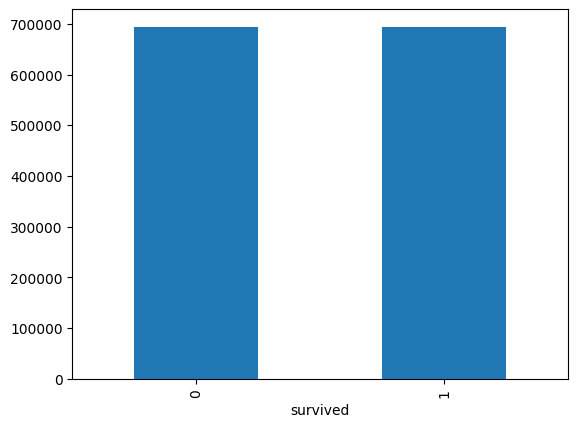

In [27]:
y.value_counts().plot(kind='bar')

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric='precision')
models, predictions = clf.fit(x_train, x_test, y_trai  n, y_test)


  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
pip install lazypredict

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#create model
#model
model=Sequential()

#1st layer input
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))

#2nd layer (hidden layer)
model.add(Dense(8, activation='relu'))

#3rd layer (hidden layer)
model.add(Dense(5, activation='relu'))

#output layer
model.add(Dense(1,activation='sigmoid'))

#global minima
#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', )
#run model(fit)
model.fit(X_train,y_train, epochs=3, batch_size=50)
#evaluate model
#save model

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred>0.5

In [ ]:
y_pred=y_pred>0.6

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))